In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

encoding_list = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for enc in encoding_list:
    try:
        data = pd.read_csv("business-operations-survey-2023-climate-change.csv", encoding=enc)
        print(f"Successfully read the file with encoding: {enc}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to read the file with encoding: {enc}. Error: {e}")

data.head

Failed to read the file with encoding: utf-8. Error: 'utf-8' codec can't decode byte 0x92 in position 99: invalid start byte
Successfully read the file with encoding: latin1


<bound method NDFrame.head of                                             description  \
0                            Total number of businesses   
1                            Total number of businesses   
2                            Total number of businesses   
3                            Total number of businesses   
4                            Total number of businesses   
...                                                 ...   
5259  To do things in D04, how important was: curren...   
5260  To do things in D04, how important was: curren...   
5261  To do things in D04, how important was: curren...   
5262  To do things in D04, how important was: curren...   
5263  To do things in D04, how important was: curren...   

                              industry  level             size line_code  \
0                                total      0   619 employees       NaN   
1                                total      0  2049 employees       NaN   
2                                

In [25]:
df = pd.DataFrame(data)
df

,description,industry,level,size,line_code,value,Unit,footnotes
0,Total number of businesses,total,0,619 employees,NaN,35562,Number of businesses,1 and 2 and 3 and 4 and 6
1,Total number of businesses,total,0,2049 employees,NaN,8796,Number of businesses,1 and 2 and 3 and 4 and 6
2,Total number of businesses,total,0,5099 employees,NaN,2529,Number of businesses,1 and 2 and 3 and 4 and 6
3,Total number of businesses,total,0,100+ employees,NaN,2100,Number of businesses,1 and 2 and 3 and 4 and 6
4,Total number of businesses,"Agriculture, forestry, & fishing",1,total,NaN,3756,Number of businesses,1 and 2 and 3 and 6
...,...,...,...,...,...,...,...,...
5259,"To do things in D04, how important was: curren...",Education & training,1,total,D0511.04,39,Number of businesses,1 and 2 and 3 and 6
5260,"To do things in D04, how important was: curren...",Health care & social assistance,1,total,D0511.04,162,Number of businesses,1 and 2 and 3 and 6
5261,"To do things in D04, how important was: curren...",Arts & recreation services,1,total,D0511.04,9,Number of businesses,1 and 2 and 3 and 6
5262,"To do things in D04, how important was: curren...",Other services,1,total,D0511.04,69,Number of businesses,1 and 2 and 3 and 6


In [26]:
print(data.head(10))

                  description  \
0  Total number of businesses   
1  Total number of businesses   
2  Total number of businesses   
3  Total number of businesses   
4  Total number of businesses   
5  Total number of businesses   
6  Total number of businesses   
7  Total number of businesses   
8  Total number of businesses   
9  Total number of businesses   

                                            industry  level             size  \
0                                              total      0   619 employees   
1                                              total      0  2049 employees   
2                                              total      0  5099 employees   
3                                              total      0   100+ employees   
4                   Agriculture, forestry, & fishing      1            total   
5                                        Agriculture      2            total   
6                                 Commercial fishing      2            total

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5264 entries, 0 to 5263
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  5264 non-null   object
 1   industry     5264 non-null   object
 2   level        5264 non-null   int64 
 3   size         5264 non-null   object
 4   line_code    5217 non-null   object
 5   value        5264 non-null   int64 
 6   Unit         5264 non-null   object
 7   footnotes    5264 non-null   object
dtypes: int64(2), object(6)
memory usage: 329.1+ KB
None


In [28]:
print(data.describe())

             level         value
count  5264.000000   5264.000000
mean      1.404255    677.564020
std       0.673562   2188.090525
min       0.000000      0.000000
25%       1.000000     39.000000
50%       2.000000    135.000000
75%       2.000000    471.000000
max       2.000000  48990.000000


In [29]:
print(data.dtypes)

description    object
industry       object
level           int64
size           object
line_code      object
value           int64
Unit           object
footnotes      object
dtype: object


In [30]:
numeric_data = data.select_dtypes(include=[float, int])

In [31]:
min_values = numeric_data.min()
print(min_values)

level    0
value    0
dtype: int64


In [32]:
max_values = numeric_data.max()
print(max_values)

level        2
value    48990
dtype: int64


In [33]:
mean_values = numeric_data.mean()
print(mean_values)

level      1.404255
value    677.564020
dtype: float64


In [34]:
missing_values = data.isnull().sum()
print("Missing value in every column:")
print(missing_values)

Missing value in every column:
description     0
industry        0
level           0
size            0
line_code      47
value           0
Unit            0
footnotes       0
dtype: int64


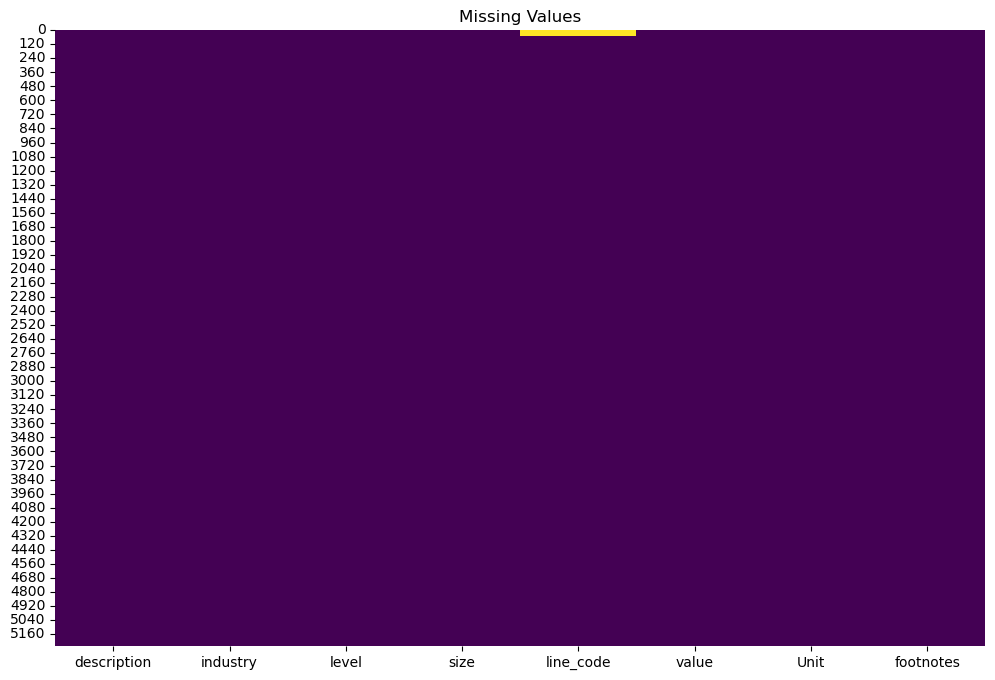

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [36]:
print("Column name:")
print(data.columns)

print("Type of data before correction:")
print(data.dtypes)

Column name:
Index(['description', 'industry', 'level', 'size', 'line_code', 'value',
       'Unit', 'footnotes'],
      dtype='object')
Type of data before correction:
description    object
industry       object
level           int64
size           object
line_code      object
value           int64
Unit           object
footnotes      object
dtype: object


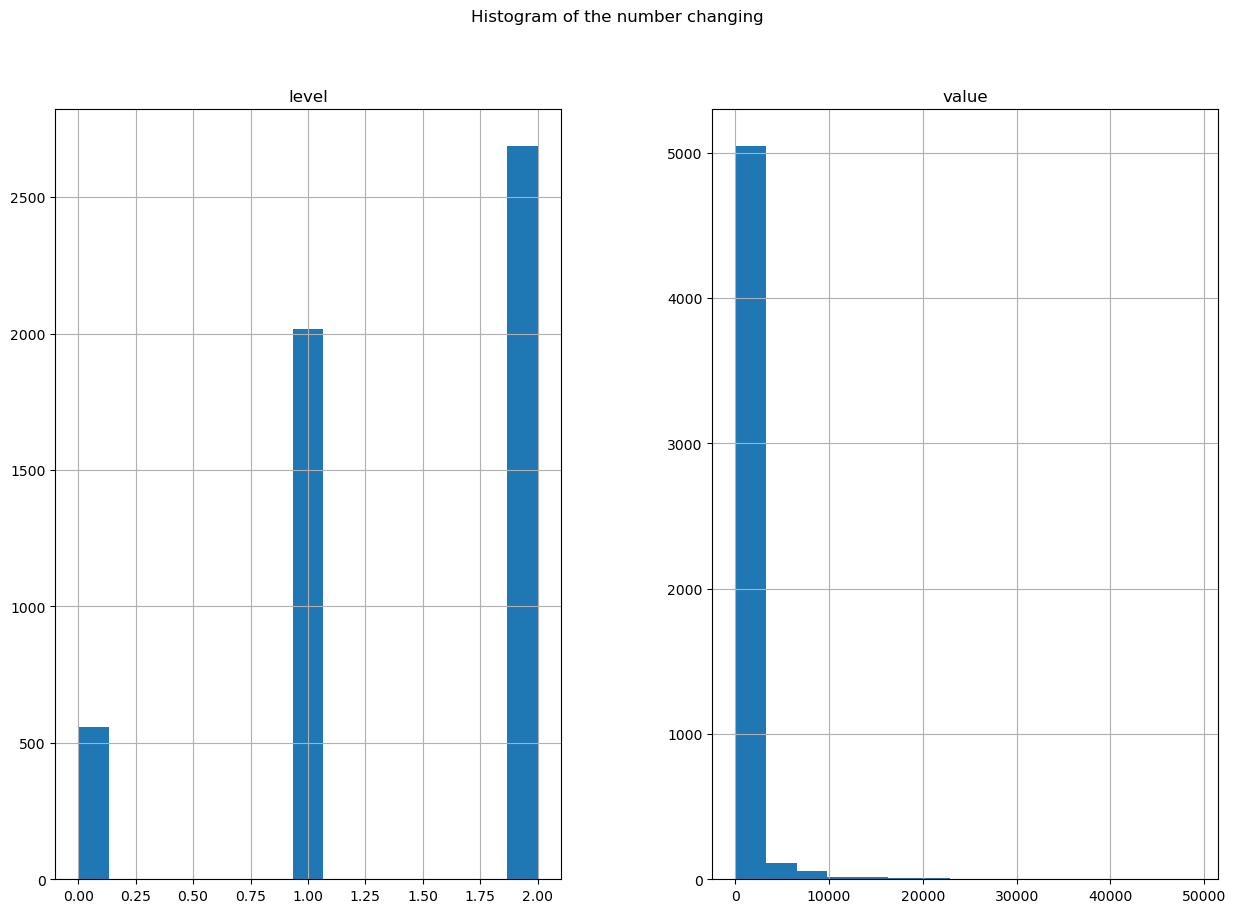

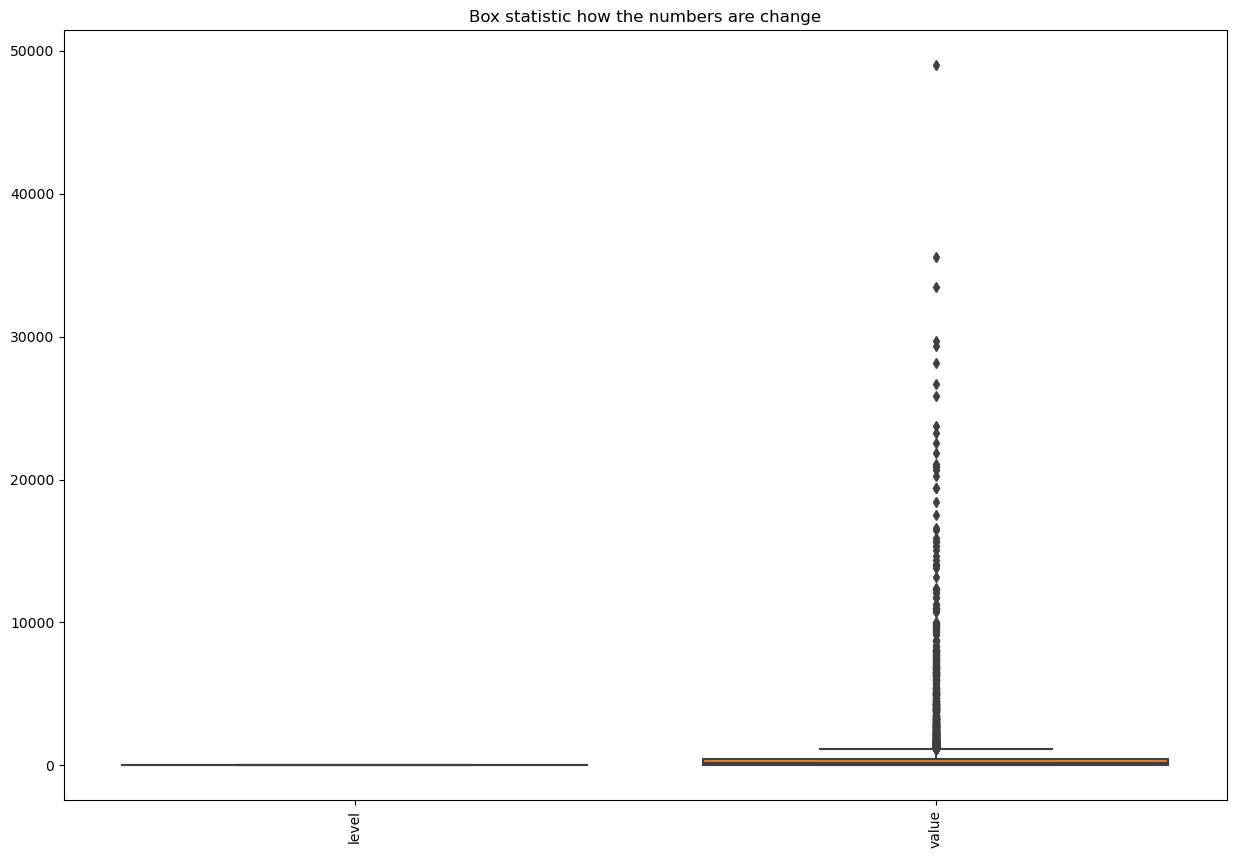

In [37]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle('Histogram of the number changing')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90)
plt.title('Box statistic how the numbers are change')
plt.show()

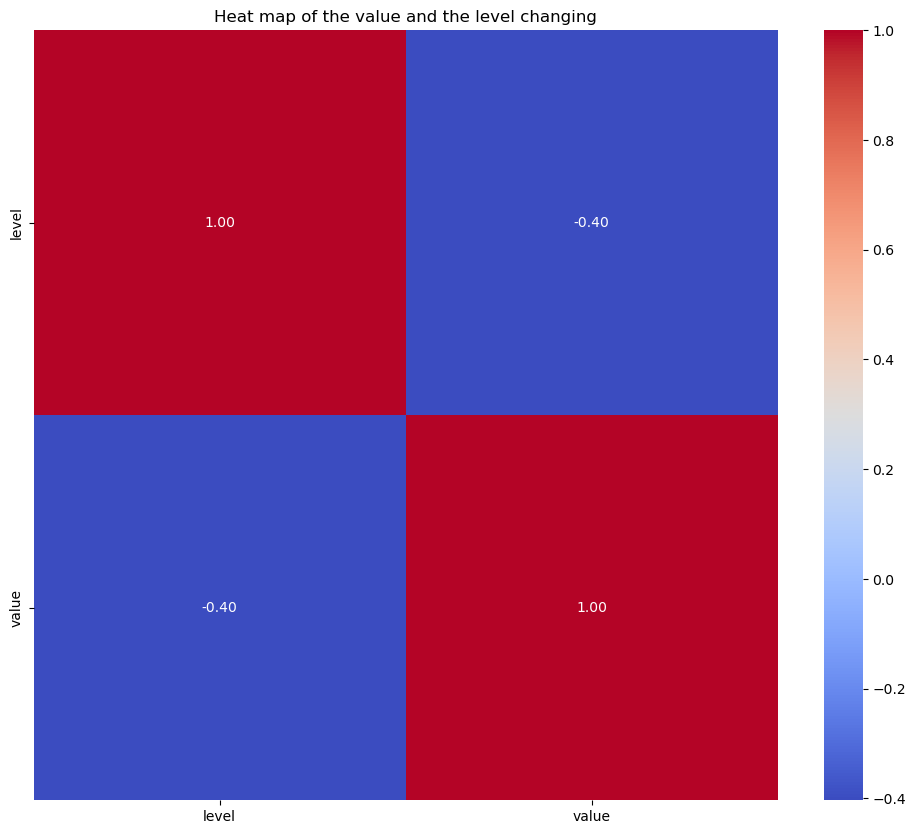

In [38]:
corr_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat map of the value and the level changing')
plt.show()